# Return and Risk of a Portfolio, Diversifiable Risk

In this notebook, I demonstrate how to calculate the return and risk of a portfolio of stocks using the adjusted price data from Yahoo Finance. 

I first download the data into a pandas dataframe. From the adjusted closing price, I calculate the returns. The mean and variance of the daily returns are then annualized to calculate the annual return and volatility of individual stocks. 

I calculate the log returns, defined as:
$$
ln(\frac{P_t}{P_{t-1}})
$$

We then take a sample weight matrix to calculate the return and risk of the portfolio. We also calculate the diversifiable and non-diversifiable risk of the portfolio and the Sharpe index of the portfolio.  

For this example we choose the following stocks: Microsoft, Apple, Boeing, Berkshire Hathaway B and Proctor&Gamble. The stocks and their portfolio weights are roughly similar to my own investment and it would be nice to find the risk and return on this portfolio. 

Finally, I compare this portfolio with a stock index, S&P500 index in this case and compare what $1000 invested in the SP500 and this sample portfolio will yield over time.


### Loading the necessary packages:


In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

### Loading the data into a pandas dataframe

In [3]:
stock_list = []

start_date=input("please enter the start date(e.g. 2019-01-01):")
end_date=input("please enter the end date(e.g. 2019-01-01):")
n=int(input("please enter the number of stocks:"))

for i in range(n):
    stock_i=(input("please enter the stock name:"))
    stock_list.append(stock_i)
print(asset_list)

close_data = pd.DataFrame()

for stock in stock_list:
    close_data[stock] = wb.DataReader(stock, data_source='yahoo', start=start_date, end=end_date)['Adj Close']

close_data.head()


please enter the start date(e.g. 2019-01-01):2019-01-01
please enter the end date(e.g. 2019-01-01):2020-01-01
please enter the number of stocks:3
please enter the stock name:AAPL
please enter the stock name:MSFT
please enter the stock name:LL
['AAPL', 'MSFT', 'LL']


,AAPL,MSFT,LL
Date,,,
2018-12-31,155.037109,99.817421,9.52
2019-01-02,155.214005,99.375191,9.97
2019-01-03,139.753540,95.719376,9.40
2019-01-04,145.719513,100.171211,10.04
2019-01-07,145.395203,100.298965,10.60


### First we visualize the relative performance of each stock

We do this by dividing their daily price by their individual starting price and multiplying with 100 using the iloc method. This signifies what $100 invested in each stock would yield over time.

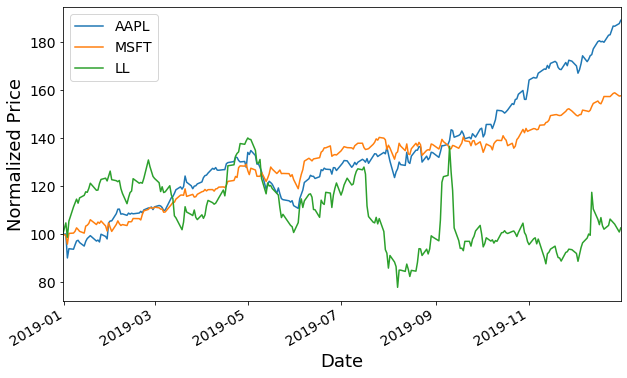

In [4]:
close_data_norm = close_data/close_data.iloc[0]*100

close_data_norm.plot(kind='line', figsize=(10, 6))
plt.xlabel('Date', size = 18)
plt.ylabel('Normalized Price', size = 18)
plt.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

We see that Apple has performed the best over time, closely followed by Boeing. 

### Calculating the daily returns, mean annual return, mean annual volatility

We calculate the daily log-returns of each stock and save it into a Pandas dataframe
The mean annual return = 250 times the mean daily return. The number of trading days is approximated as 250.
The daily volatility is the standard deviation of the daily returns. 
Annual volatility = daily volatility x $\sqrt{250}$

The covariance matrix is calculated using the cov method.

In [5]:
return_data = np.log(close_data/close_data.shift(1))

pf_mean_arr = return_data.mean()*250

pf_covariance_arr = return_data.cov()*250

pf_variance_arr = return_data.var()*250

print("Vector of Mean Returns:")
print(pf_mean_arr)

print("Matrix of Covariances:")
print(pf_covariance_arr)

print("Vector of Variances:")
print(pf_variance_arr)


Vector of Mean Returns:
AAPL    0.631303
MSFT    0.451016
LL      0.025716
dtype: float64
Matrix of Covariances:
          AAPL      MSFT        LL
AAPL  0.068604  0.032196  0.049232
MSFT  0.032196  0.038973  0.032759
LL    0.049232  0.032759  0.308838
Vector of Variances:
AAPL    0.068604
MSFT    0.038973
LL      0.308838
dtype: float64


For the calculations of the next section we convert the pf_mean_arr and pf_covariance_arr into numpy arrays. These are saved as Pandas Series and Dataframe at this stage and for the calculations of the next phase it would help to convert these into numpy arrays

In [6]:
pf_mean_arr = pf_mean_arr.values
pf_covariance_arr = pf_covariance_arr.values

print(type(pf_mean_arr))
print(type(pf_covariance_arr))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


We next select an array of weights, which is how much (%) of the wealth is invested in each stock. The weights selected here closely corresponds to my own portfolio. This array should sum to 1, otherwise the calculations are to be scaled accordingly.

In [9]:
weights = np.array([0.3,0.3,0.4])
print(weights.sum())

1.0


The portfolio return is : $\mu = \bf{w}.\bf{r}$ and the portfolio variance is $\sigma^2 = \bf{w}^T \bf{C} \bf{w}$ where $\bf{C}$ is the covariance matrix of stock returns. The volatility (risk) of the portfolio is the square root of the portfolio variance. 

In [10]:
pf_return = np.dot(weights, pf_mean_arr)
print('The annual return rate of the portfolio is {0:.3f} %'.format(pf_return*100))

pf_vol = np.sqrt(np.dot(weights.T, np.dot(pf_covariance_arr, weights)))
print('The annual volatility of the portfolio is {0:.3f} %'.format(pf_vol*100))


The annual return rate of the portfolio is 33.498 %
The annual volatility of the portfolio is 29.081 %


### Sharpe Ratio

The Shape ratio of a portfolio/asset is defined as:

##### Sharpe Ratio = $\frac{r_i - r_f}{\sigma_i}$

where $r_i$ is the return of the security, $r_f$ is the risk free rate and $\sigma_i$ is the volatility of the security. We take $r_f$ as the yield of a 10 yr US Treasury Note, historically about 2.5 %

In [11]:
r_f = 0.025
sharpe_p = (pf_return - r_f)/pf_vol

print('The Sharpe Ratio of the portfolio is {0:.3f}'.format(sharpe_p))

The Sharpe Ratio of the portfolio is 1.066


### Diversifiable and Non-Diversifiable Risk

The diversifiable and non-diversifiable risk of a portfolio are defined as:

Diversifiable Risk = Portfolio Variance - Weighted Variances

Non Diversifiable Risk = Weighted Variances

In [12]:
ndr_p = np.dot(weights*weights, pf_variance_arr)
print(ndr_p)

print('The Non-Diversifiable Risk of the portfolio is {0:.3f} %'.format(ndr_p*100))

dr_p = pf_vol*pf_vol - ndr_p 

print('The Diversifiable Risk of the portfolio is {0:.3f} %'.format(dr_p*100))

0.059096092134188
The Non-Diversifiable Risk of the portfolio is 5.910 %
The Diversifiable Risk of the portfolio is 2.547 %


### Comparison with S&P500

We next load the data for SP 500 and calculate its risk and return.

In [14]:
SP = wb.DataReader('^GSPC', data_source='yahoo', start=start_date, end=end_date)['Adj Close']
SP_return = np.log(SP/SP.shift(1))

SP_r = SP_return.mean()*250
SP_risk = np.sqrt(SP_return.var()*250)

print('The Annual Return of S&P500 is {0:.3f} %'.format(SP_r*100))
print('The Annual Volatility of S&P500 is {0:.3f} %'.format(SP_risk*100))

The Annual Return of S&P500 is 25.168 %
The Annual Volatility of S&P500 is 12.440 %


### Next we visualize what $1000 invested in each portfolio will yield over time. 

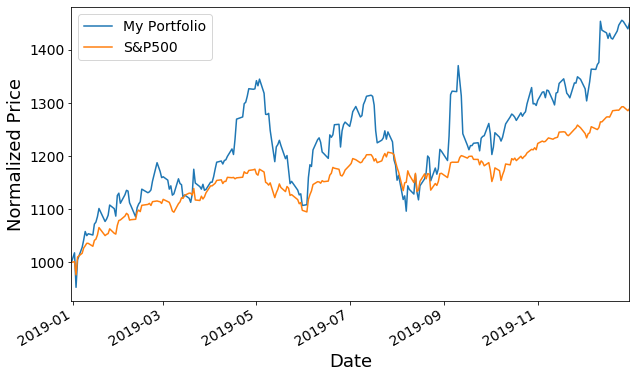

In [15]:
SP_norm = (SP/SP.iloc[0])*1000

shares = 1000*weights/close_data.iloc[0]   #shares of each stock purchased on day 0

price_data = shares*close_data

price_data['Wealth'] = price_data.sum(axis=1)


price_data['Wealth'].plot(kind='line', figsize=(10, 6), label = 'My Portfolio')
SP_norm.plot(kind='line', figsize=(10, 6), label = 'S&P500')
plt.xlabel('Date', size = 18)
plt.ylabel('Normalized Price', size = 18)
plt.tick_params(labelsize=14)
plt.legend(prop={'size': 14})
